In [129]:
from bs4 import BeautifulSoup as BS 
import ssl, urllib 
import traceback

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
from urllib.parse import quote_plus

from selenium.webdriver import ActionChains

path = '../chromedriver'

from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--no-sandbox')
options.add_argument('--headless')
options.add_argument('--disable-dev-shm-usage')

In [239]:
from matplotlib import pyplot as plt

In [126]:
import time
from konlpy.tag import Okt
okt=Okt()
import re
from collections import Counter

In [127]:
import emoji
def give_emoji_free_text(text):
    allchars = [str for str in text.decode('utf-8')]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.decode('utf-8').split() if not any(i in str for i in emoji_list)])
    return clean_text

## Setting for mobile version

In [130]:
baseurl = 'http://www.inven.co.kr/board/lineagem/5019?category=%EC%9E%A1%EB%8B%B4&sort=PID&p='

pagenum = [str(i) for i in list(range(1, 100))]

driver = webdriver.Chrome(path, options=options)

In [99]:
body = []
author = []

In [100]:
for pg in pagenum:
   # print(pg)
    url = baseurl+quote_plus(pg)
    driver.get(url)
    time.sleep(1)
    html = driver.page_source
    soup = BS(html)

    full = soup.find("td", {"valign": "TOP"})
    for i in full.find_all("td", {"class":"bbsSubject"}):
        body.append(i.find("a", {"class":"sj_ln"}).text)

    for i in full.find_all("td", {"class":"bbsNick"}):
        author.append(i.find('span').text)
    time.sleep(1)
driver.quit()

In [101]:
body2 = [i[7:] for i in body]

mobile_df = pd.DataFrame(body2,author)
mobile_df.reset_index(inplace = True)
mobile_df.columns = ['writer', 'title']

In [102]:
mobile_df

,writer,title
0,Rakii,라이브 방송 보기 오픈/스트리머 등록 안내
1,Rakii,홍보/불법/거래글에 대한 당부의 말씀
2,Rakii,아이템 판매 등 거래 게시물은 무통보 삭제..
3,Rakii,버땅 신규 몬스터 추가! 13일 업데이트 ..
4,Rakii,선택받은 자의 용기
...,...,...
5941,악마왕,팩트는 이거 아님?
5942,이실로테,라인이나 막피나 머 그게 그거 아님?
5943,검성이왜짐,웃는건 택진이
5944,마지막자몽,막피들 이번기회에 다 차단 넣을 수 있었다


## Setting for lineage

In [136]:
base_url = 'http://www.inven.co.kr/board/lineage/339?sort=PID&p='
driver = webdriver.Chrome(path, options=options)

In [137]:
body_lineage = []
author_lineage = []

In [138]:
for pg in pagenum:
    url = base_url+quote_plus(pg)
    driver.get(url)
    time.sleep(1)
    html = driver.page_source
    soup = BS(html)

    full = soup.find("td", {"valign": "TOP"})
    for i in full.find_all("td", {"class":"bbsSubject"}):
        body_lineage.append(i.find("a", {"class":"sj_ln"}).text)

    for i in full.find_all("td", {"class":"bbsNick"}):
        author_lineage.append(i.find('span').text)
    time.sleep(1)
driver.quit()

http://www.inven.co.kr/board/lineage/339?sort=PID&p=1
http://www.inven.co.kr/board/lineage/339?sort=PID&p=2
http://www.inven.co.kr/board/lineage/339?sort=PID&p=3
http://www.inven.co.kr/board/lineage/339?sort=PID&p=4
http://www.inven.co.kr/board/lineage/339?sort=PID&p=5
http://www.inven.co.kr/board/lineage/339?sort=PID&p=6
http://www.inven.co.kr/board/lineage/339?sort=PID&p=7
http://www.inven.co.kr/board/lineage/339?sort=PID&p=8
http://www.inven.co.kr/board/lineage/339?sort=PID&p=9
http://www.inven.co.kr/board/lineage/339?sort=PID&p=10
http://www.inven.co.kr/board/lineage/339?sort=PID&p=11
http://www.inven.co.kr/board/lineage/339?sort=PID&p=12
http://www.inven.co.kr/board/lineage/339?sort=PID&p=13
http://www.inven.co.kr/board/lineage/339?sort=PID&p=14
http://www.inven.co.kr/board/lineage/339?sort=PID&p=15
http://www.inven.co.kr/board/lineage/339?sort=PID&p=16
http://www.inven.co.kr/board/lineage/339?sort=PID&p=17
http://www.inven.co.kr/board/lineage/339?sort=PID&p=18
http://www.inven.co

In [140]:
body_lineage2 = [i[7:] for i in body_lineage]

lineage_df = pd.DataFrame(body_lineage2,author_lineage)
lineage_df.reset_index(inplace = True)
lineage_df.columns = ['writer', 'title']

In [142]:
lineage_df.to_csv('lineage.csv', encoding="utf-8-sig")

mobile_df.to_csv('mobile.csv', encoding='utf-8-sig')

## NLP1 - lineage

In [145]:
words = " // \n".join(lineage_df['title'])

words_filtered =  re.sub('[^ 0-9a-zA-Zㄱ-ㅣ가-힣!?.]','',words)

words_filtered2 =words_filtered.replace('.', ' ')

In [163]:
NLP_word = []

for word in words_filtered2.split():
    words = okt.nouns(word)
    for _ in words:
        NLP_word.append(_)

## NLP2 - mobile

In [166]:
words = " // \n".join(mobile_df['title'])

words_filtered =  re.sub('[^ 0-9a-zA-Zㄱ-ㅣ가-힣!?.]','',words)

words_filtered2 =words_filtered.replace('.', ' ')

In [167]:
NLP_word_mobile = []

for word in words_filtered2.split():
    words = okt.nouns(word)
    for _ in words:
        NLP_word_mobile.append(_)

In [196]:
count_lineage = Counter(NLP_word).most_common()

In [197]:
count_mobile = Counter(NLP_word_mobile).most_common()

## keyword count analysis

In [220]:
keyword_lineage = [i for (i, j) in count_lineage]
kw_count_lineage = [j for (i, j) in count_lineage]
kw_perc_lineage = [j/len(NLP_word) for (i, j) in count_lineage]

keyword_mobile = [i for (i, j) in count_mobile]
kw_count_mobile = [j for (i, j) in count_mobile]
kw_perc_mobile = [j/len(NLP_word_mobile) for (i, j) in count_mobile]

In [227]:
lin_kw_df = pd.DataFrame([keyword_lineage, kw_count_lineage, kw_perc_lineage]).transpose()


In [232]:
lin_kw_df = pd.DataFrame([keyword_lineage, kw_count_lineage, kw_perc_lineage]).transpose()
lin_kw_df.columns = ['word', 'freq', 'percent']

m_kw_df = pd.DataFrame([keyword_mobile, kw_count_mobile, kw_perc_mobile]).transpose()
m_kw_df.columns = ['word', 'freq', 'percent']

In [257]:
lin_kw_df[lin_kw_df['word']=='법사']

,word,freq,percent
94,법사,23,0.00167957


In [249]:
m_kw_df[:20]

,word,freq,percent
0,형,430,0.0213135
1,체,245,0.0121437
2,좀,205,0.0101611
3,법사,198,0.00981413
4,계정,180,0.00892193
5,질문,177,0.00877323
6,총사,171,0.00847584
7,유저,150,0.00743494
8,패키지,142,0.00703841
9,패,129,0.00639405


## TFIDF

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [270]:
def computeTF(wordDict, wordlist):
    tfDict = {}
    for word, count in wordDict.items():
        tfDict[word] = count / float(len(wordlist))
    return tfDict

In [272]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [274]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [265]:
uniqueWords = set(NLP_word).union(set(NLP_word_mobile))

numWords_lineage = dict.fromkeys(uniqueWords, 0)

for word in NLP_word:
    numWords_lineage[word] +=1

numWords_mobile = dict.fromkeys(uniqueWords, 0)

for word in NLP_word_mobile:
    numWords_mobile[word] +=1

In [271]:
tfLineage = computeTF(numWords_lineage, NLP_word)
tfMobile = computeTF(numWords_mobile, NLP_word_mobile)

In [273]:
idfs = computeIDF([numWords_lineage, numWords_mobile])

In [275]:
tfidfLineage = computeTFIDF(tfLineage, idfs)
tfidfMobile = computeTFIDF(tfMobile, idfs)

In [279]:
tfidfDF = pd.DataFrame([tfidfLineage, tfidfMobile]).transpose()

tfidfDF.columns = ['Lineage', 'Mobile']

In [292]:
pd.DataFrame(tfidfDF['Lineage']).sort_values('Lineage', ascending = False)[:20]

,Lineage
불금,0.001569
자본,0.001316
테섭,0.001265
터널,0.001164
컬러풀,0.001114
패션,0.000962
피방,0.000911
소개,0.000911
패스,0.000860
베니,0.000759


In [293]:
pd.DataFrame(tfidfDF['Mobile']).sort_values('Mobile', ascending = False)[:20]

,Mobile
피빨,0.003333
페북,0.003333
암기,0.003195
정이,0.002989
첸,0.002096
용옥,0.001890
코,0.001787
시발,0.001065
증표,0.001031
헬린,0.001031


## unique user

In [307]:
len(lineage_df['writer'])/len(set(lineage_df['writer']))

2.8674388674388673

In [308]:
len(mobile_df['writer'])/len(set(mobile_df['writer']))

4.29004329004329

In [187]:
len(lineage_df['writer'])

4456

In [183]:
len(mobile_df['writer'])

5946

In [294]:
len(set(lineage_df['writer']))

1554

In [295]:
lineage_users = Counter(lineage_df['writer']).most_common()

In [296]:
mobile_users = Counter(mobile_df['writer']).most_common()

In [297]:
lineage_writer_cnt = [j for i,j in lineage_users]

In [304]:
mobile_writer_cnt = [j for i,j in mobile_users]

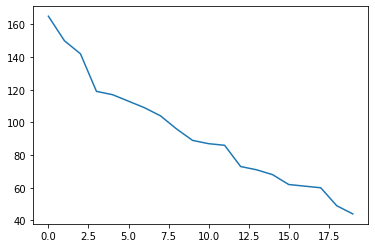

In [305]:
plt.plot(lineage_writer_cnt[:20])

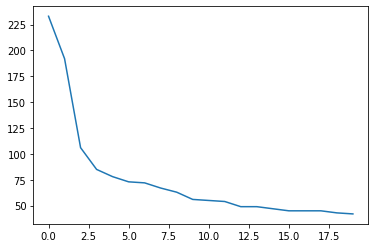

In [306]:
plt.plot(mobile_writer_cnt[:20])